#Sentiment Analysis on Tweets of U.S Election Parties by Remi Oni

#Introduction

This project deals with the analysis of the sentiment of tweets of Democratic and Republican presidential candidates. Many people expressed their opinions about each candidate on different social networks, including Twitter, a popular microblogging site. Each microblog is referred to as a “Tweet” and cannot go beyond 280 characters. Tweets often also have a label for another Twitter user they are referencing (e.g. @username), and a “hashtag” that indicates the tweet’s topic. The purpose of this project is to analyze the tweets and determine if they are coming from a specific party. Since I am taking only two major U.S. parties into account, it is a binary classification problem

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Final Project/tweetdata.csv')

In [4]:
df.shape

(86460, 3)

The Tweets dataset has 86460 rows and 3 columns( 3 variables).

In [5]:
df.tail()

,Party,Handle,Tweet
86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...
86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear..."
86457,Republican,RepTomPrice,We are forever grateful for the service and sa...
86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...
86459,Republican,RepTomPrice,#Zika fears realized in Florida. House GOP act...


The above is the last five rows of the Tweets dataset

# Data Preparation,Cleaning and EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86460 entries, 0 to 86459
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Party   86460 non-null  object
 1   Handle  86460 non-null  object
 2   Tweet   86460 non-null  object
dtypes: object(3)
memory usage: 2.0+ MB


The three variables(columns) of the Tweet Dataset are of a String Object.

In [7]:
df.describe()
df.describe().transpose()


,count,unique,top,freq
Party,86460,2,Republican,44392
Handle,86460,433,RepDarrenSoto,200
Tweet,86460,84502,"RT @RepDanKildee: Four years later, Flint fami...",31


The above shows the number of unique entry present in each column of the Tweets dataset and also the first data point and its frequency in each column.

In [8]:
### Checking Missing values and the percentage for Missing:
totalnull = df.isnull().sum()
count = totalnull.sort_values(ascending=False)
percentage = ((totalnull/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')
missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
Party,0,0.0
Handle,0,0.0
Tweet,0,0.0


The analysis above shows there was no case of missing values in each of the column of the dataset.

Republican    44392
Democrat      42068
Name: Party, dtype: int64
Republican    51.34
Democrat      48.66
Name: Party, dtype: float64


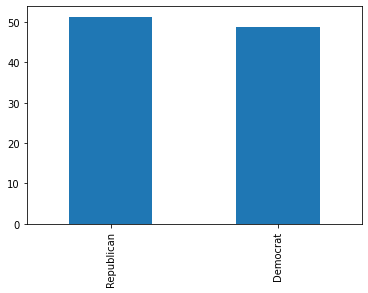

In [9]:
### Checking for the Distribution of Default ###
print(round(df.Party.value_counts())) # value counts gives the frequency of unique values 

print(round(df.Party.value_counts(normalize=True)*100,2))
round(df.Party.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.show()

The bar chart above shows a case of a balanced dataset because the percentages of the classes (Type of Party) of the target variable(Party) are  very close.
I have 51.34% of Republican and 48.66% of Democrat in the target variable(Party).

In [10]:
#Removing columns
df.drop(columns = ['Handle'], inplace = True) #Original dataset will be chnaged for inplace=TRUE

Since I am only concerned with variables "Party" and "Tweet" then I need to remove the variable named "Handle" from my dataset because it is not needed for the model fiting and evaluation.

### Data Cleaning

In [11]:
#Cleaning 
import re 
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…@#]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x) # lambda function 
# lambda function is a powerful process when used with Python’s built-in functions.

In [12]:
# Now, taking a look at the updated text
df['cleaned_tweet'] = pd.DataFrame(df.Tweet.apply(cleaned1))
df.head(10)

,Party,Tweet,cleaned_tweet
0,Democrat,"Today, Senate Dems vote to #SaveTheInternet. P...",today senate dems vote to savetheinternet prou...
1,Democrat,RT @WinterHavenSun: Winter Haven resident / Al...,rt winterhavensun winter haven resident alta ...
2,Democrat,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,rt nbclatino repdarrensoto noted that hurrican...
3,Democrat,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,rt nalcabpolicy meeting with repdarrensoto th...
4,Democrat,RT @Vegalteno: Hurricane season starts on June...,rt vegalteno hurricane season starts on june ...
5,Democrat,RT @EmgageActionFL: Thank you to all who came ...,rt emgageactionfl thank you to all who came ou...
6,Democrat,Hurricane Maria left approx $90 billion in dam...,hurricane maria left approx billion in damage...
7,Democrat,RT @Tharryry: I am delighted that @RepDarrenSo...,rt tharryry i am delighted that repdarrensoto ...
8,Democrat,RT @HispanicCaucus: Trump's anti-immigrant pol...,rt hispaniccaucus trumps antiimmigrant policie...
9,Democrat,RT @RepStephMurphy: Great joining @WeAreUnidos...,rt repstephmurphy great joining weareunidosus ...


Overview of the cleaned Dataset free of unwanted characters and all other irrelevant information.
Since my Dataset is now cleaned, I can now go on and partition the dataset into training and test.

# Data partition

In [13]:
from sklearn.model_selection import train_test_split

x = df.cleaned_tweet
y = df.Party

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 225)

print('x_train :', len(x_train))
print('x_test  :', len(x_test))
print('y_train :', len(y_train))
print('y_test  :', len(y_test))
y_test.head()


x_train : 57928
x_test  : 28532
y_train : 57928
y_test  : 28532


74606    Republican
11748      Democrat
33237      Democrat
40449      Democrat
41914      Democrat
Name: Party, dtype: object

I partition the dataset into 2:1 sample size. The training data take randomly 67% of the whole dataset and the test data take randomly 33% of the whole dataset

# Model training
I will be using three machine learning model to determine if a Tweet is coming from a specific party.
1. Perceptron Model
2. ANN Model
3. SVM Model.

The performance of the three model will be examined and compared using AUC score, Precision and Recall.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()


Getting an Encoded Vector for the Tweets

## Perceptron Model

In [15]:
from sklearn.neural_network import MLPClassifier
clf1= MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10), random_state=1)


In [16]:
# # importing pipes for making the Pipe flow
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model = Pipeline(steps=[('vectorizer',tvec),('classifier',clf1)]) 
# This is a very simple model without optimization. Here I did not add any optimization things.

model.fit(x_train, y_train) # I called fit() method of the pipe object on our training data



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=10,
                               random_state=1, solver='lbfgs'))])

#Prediction

In [17]:
predictions = model.predict(x_test)

# Model evaluation

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
confusion_matrix(predictions, y_test)

array([[10707,  3232],
       [ 3150, 11443]])

The above is the confusion matrix of the Perceptron model with a True postive count of 10707, False Positive count of 3232, True Negative count of 11443 and
False negative count of 3150

In [19]:
print("Accuracy : ", accuracy_score(predictions, y_test))
print("Precision : ", precision_score(predictions, y_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, y_test, average = 'weighted'))

Accuracy :  0.7763213234263283
Precision :  0.7763009658879582
Recall :  0.7763213234263283


The Perceptron model has an accuracy of 77.6% in terms of the prediciton performance of the model. The Precision of 77.6% indicates the Perceptron model has a low false postive rate (low wrong Classfication of Republican Party).
The Recall of 77.6% also indicates the Perceptron model has a good percentage
of detecting whether a tweet comes from a Republican Party.

In [20]:
# make the categorical to binary
y_numeric, meta_data1 = pd.factorize(y_test)
pred_numeric, meta_data2 = pd.factorize(predictions)
meta_data2

array(['Republican', 'Democrat'], dtype=object)

The prediction is encoded as having value "0" for the Republican Party and value "1" as the Democrat Party.

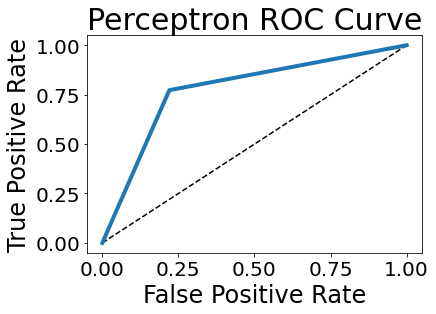

In [21]:
# Get the ROC curve:
fpr, tpr, thresh = roc_curve(y_numeric, pred_numeric)
plt.figure()
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,linewidth=4)
plt.xlabel('False Positive Rate',size=24)
plt.ylabel('True Positive Rate',size=24)
plt.title('Perceptron ROC Curve',fontsize=30)
plt.tick_params(axis='both',labelsize=20)
plt.show()


The ROC curve above shows the trade-off between sensitivity (or TPR) and False Positive Rate(1 – Specificity). It further indicates that the model performs better against the bench mark (50%) with total area of 77.62%.

In [22]:
# Get the AUC metric:
AUC = roc_auc_score(y_numeric, pred_numeric)
print(AUC)

0.776219783997141


An AUC score of 0.7762 shows the Perceptron Model has a 77.62% ability to classify correctly either the Tweets comes from a Republican Party or a Democrat Party.

## Trying on new reviews 

In [23]:
example = ["good meeting with president Biden"]
result = model.predict(example)
print(result)

['Democrat']


The Tweet "good meeting with president Biden" was predicted by the Perceptron Model to have come from a Democrat Party.


# ANN Model

In [35]:
from sklearn.neural_network import MLPClassifier
clf2= MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(4,6,8), random_state=1,max_iter=1000)


In [36]:
# # importing pipes for making the Pipe flow
from sklearn.pipeline import Pipeline

model2= Pipeline(steps=[('vectorizer',tvec),('classifier',clf2)]) 
# This is a very simple model without optimization. Here I did not add any optimization things.

model2.fit(x_train, y_train) # I called fit() method of the pipe object on our training data



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=(4, 6, 8),
                               max_iter=1000, random_state=1,
                               solver='lbfgs'))])

#Prediction

In [37]:
predictions2= model2.predict(x_test)

# Model evaluation

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
confusion_matrix(predictions2, y_test)

array([[10164,  3490],
       [ 3693, 11185]])

The above is the confusion matrix of the Perceptron model with a True postive count of 10707, False Positive count of 3232, True Negative count of 3150 and
False negative count of 3150

In [39]:
print("Accuracy : ", accuracy_score(predictions2, y_test))
print("Precision : ", precision_score(predictions2, y_test, average = 'weighted'))
print("Recall : ", recall_score(predictions2, y_test, average = 'weighted'))

Accuracy :  0.7482475816626946
Precision :  0.7484516949991593
Recall :  0.7482475816626946


The Perceptron model has an accuracy of 74.82% in terms of the prediciton performance of the model. The Precision of 74.85% indicates the Perceptron model has a low false postive rate (low wrong Classfication of Republican Party)
The Recall of 74.82% also indicates the Perceptron model has a good percentage
of detecting whether a tweet comes from a Republican Party.

In [40]:
# make the categorical to binary
y_numeric, meta_data1 = pd.factorize(y_test)
pred_numeric, meta_data2 = pd.factorize(predictions2)
meta_data1

Index(['Republican', 'Democrat'], dtype='object')

The prediction is encoded as having value "0" for the Republican Party and value "1" as the Democrat Party.

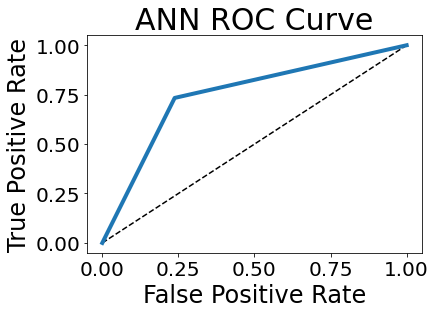

In [41]:
# Get the ROC curve:
fpr, tpr, thresh = roc_curve(y_numeric, pred_numeric)
plt.figure()
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,linewidth=4)
plt.xlabel('False Positive Rate',size=24)
plt.ylabel('True Positive Rate',size=24)
plt.title('ANN ROC Curve',fontsize=30)
plt.tick_params(axis='both',labelsize=20)
plt.show()


The ROC curve above shows the trade-off between sensitivity (or TPR) and False Positive Rate(1 – Specificity). It further indicates that the model performs better against the bench mark (50%) with total area of 77.62%.

In [42]:
# Get the AUC metric:
AUC = roc_auc_score(y_numeric, pred_numeric)
print(AUC)

0.7478363385365165


An AUC score of 0.7762 shows the Perceptron Model has a 74.78% ability to classify correctly either the Tweets comes from a Republican Party or a Democrat Party.

## Trying on new reviews 

In [43]:
example = ["good meeting with president Biden"]
result = model2.predict(example)
print(result)

['Democrat']


The Tweet "good meeting with president Biden" was predicted by the Perceptron Model to have come from a Democrat Party.


# SVM Model

In [24]:
from sklearn import svm
clf3= svm.LinearSVC()


In [26]:
# # importing pipes for making the Pipe flow
from sklearn.pipeline import Pipeline

model3= Pipeline(steps=[('vectorizer',tvec),('classifier',clf3)]) 
# This is a very simple model without optimization. Here I did not add any optimization things.

model3.fit(x_train, y_train) # I called fit() method of the pipe object on our training data



Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('classifier', LinearSVC())])

#Prediction

In [27]:
predictions3= model3.predict(x_test)

# Model evaluation

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
confusion_matrix(predictions3, y_test)

array([[10846,  2865],
       [ 3011, 11810]])

The above is the confusion matrix of the Perceptron model with a True postive count of 10846, False Positive count of 2865, True Negative count of 11810 and
False negative count of 3011

In [29]:
print("Accuracy : ", accuracy_score(predictions3, y_test))
print("Precision : ", precision_score(predictions3, y_test, average = 'weighted'))
print("Recall : ", recall_score(predictions3, y_test, average = 'weighted'))

Accuracy :  0.7940557969998598
Precision :  0.7941686840695895
Recall :  0.7940557969998598


The Perceptron model has an accuracy of 79.41% in terms of the prediciton performance of the model. The Precision of 79.42% indicates the Perceptron model has a low false postive rate (low wrong Classfication of Republican Party).
The Recall of 79.41% also indicates the Perceptron model has a good percentage
of detecting whether a tweet comes from a Republican Party.

In [32]:
# make the categorical to binary
y_numeric, meta_data1 = pd.factorize(y_test)
pred_numeric, meta_data2 = pd.factorize(predictions3)
meta_data1

Index(['Republican', 'Democrat'], dtype='object')

The prediction is encoded as having value "0" for the Republican Party and value "1" as the Democrat Party.

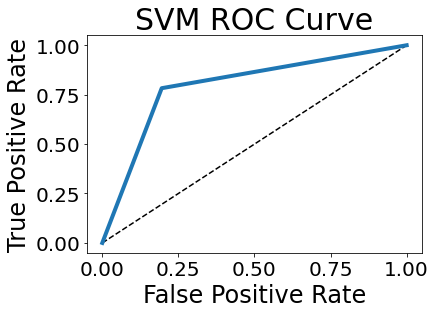

In [33]:
# Get the ROC curve:
fpr, tpr, thresh = roc_curve(y_numeric, pred_numeric)
plt.figure()
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,linewidth=4)
plt.xlabel('False Positive Rate',size=24)
plt.ylabel('True Positive Rate',size=24)
plt.title('SVM ROC Curve',fontsize=30)
plt.tick_params(axis='both',labelsize=20)
plt.show()


The ROC curve above shows the trade-off between sensitivity (or TPR) and False Positive Rate(1 – Specificity). It further indicates that the model performs better against the bench mark (50%) with total area of 79.37%.

In [23]:
# Get the AUC metric:
AUC = roc_auc_score(y_numeric, pred_numeric)
print(AUC)

0.7937395585647953


An AUC score of 0.7937 shows the Perceptron Model has a 79.37% ability to classify correctly either the Tweets comes from a Republican Party or a Democrat Party.

## Trying on new reviews 

In [34]:
example = ["good meeting with president Biden"]
result = model3.predict(example)
print(result)

['Democrat']


The Tweet "good meeting with president Biden" was predicted by the SVM Model to have come from a Democrat Party.

# Model Comparison
In terms of AUC score, Accuracy,Precision and Recall, SVM perform better than both Perceptron and ANN model. The perceptron Model with 10 neurons also peform better than ANN, this may be due to non convergence of the ANN model. In General, the three models all had a score greater than 70% with respect to their AUC,Accuracy,Precision and Recall. 

#Recommendation

This project can help the US government to analyse the significant of twitter social media on US presidential election. It will also help the US Government to have an overview of the most Active party on Twitter which can actually influence the performance of the party in the Presidential election. 

Subsequent work that can be done using this project will be sentiment analysis of the effect of user tweet on the US presidential election result. Since it is known that a tweets can serve as a means of campaign awareness on US election. Also, we can also have the sentiment analysis to determine if a particular tweets is coming from a specific handle after identifying the active members of the parties on Twitter. i.e tweets from the candidate of the parties.

In addition, Sentiment analysis on the tweets can  allows the US government  to keep track of what's being said about the country on social media, and can help to detect angry citizens or negative mentions before they they escalate.

Lastly, Twitter sentiment analysis can track specific keywords and topics to detect customer trends and interests. Understanding what customers like, what their behaviors are, and how this changes over time is essential if you are planning to launch a new product.